# COGS209 Project 2 


In [16]:
#Imports
import pandas as pd, numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load data
data=pd.read_csv('https://www.dropbox.com/scl/fi/eut3hbc6vh94713teclkd/heart.csv?rlkey=24b949anqmwjs4g9zstvdyrv0&st=xb2s3u6m&dl=1')
#Preview data
print(data.shape)
print(data)

(918, 12)
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172       

In [17]:
# preprocess the data by converting the categorical variable into numerical values 
# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# convert categorical data to numerical data 
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])
# display the first 5 rows of the data for validation that the conversion was successful
print(data.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [18]:
# process the data for K-nearest neighbors algorithm

# split the data into features and target variable
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Best K value: 11 with accuracy score 0.7228260869565217


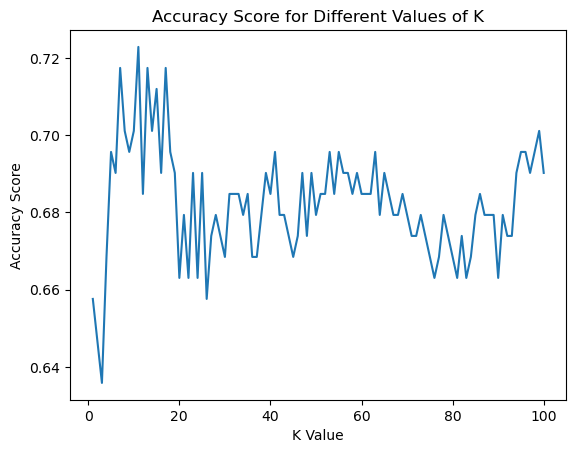

In [19]:
# train the K-nearest neighbors model on multiple values of K to determine the best 
# value of K for the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# list potential K values
k_values = list(range(1, 101))

# create a list to store the accuracy scores for each K value
accuracy_scores = []

# loop through each K value and calculate the accuracy score for the model
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# find the K value with the highest accuracy 
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print('Best K value:', best_k, 'with accuracy score', max(accuracy_scores))

# plot the accuracy score for each value of K to visualize the best K value
plt.plot(k_values, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of K')
plt.show()

#Cross Validation


In [20]:
#Check if the classes are balanced
class_count=data['HeartDisease'].value_counts()
lowerlimit=class_count[0]*0.2
upperlimit=class_count[0]*1.2
if lowerlimit <= class_count[0] <= upperlimit: 
    print("Data classes well balanced, use regular K-folds cross validation")

#print the number of samples in each class
print(data['HeartDisease'].value_counts())


Data classes well balanced, use regular K-folds cross validation
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [21]:
#Calculate cross validation scores using K folds and Stratified K Folds
from sklearn.model_selection import cross_val_score, StratifiedKFold
#Use K-folds cross validation with 5 folds and print accuracy scores
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
scores = cross_val_score(knn, X, y, cv=5)
cv=StratifiedKFold(n_splits=5)
#Use stratified K-folds cross validation with 5 folds to see if balancing classes changes accuracy scores
scores_strat = cross_val_score(knn, X, y, cv=cv)
print(scores)
print(scores_strat)

[0.61956522 0.79891304 0.64673913 0.71584699 0.63387978]
[0.61956522 0.79891304 0.64673913 0.71584699 0.63387978]


In [22]:
#Plot resubsitution and testing error for kfolds in a range of 1-5 folds using KNN with 11 nearest neighbors
#This code manually calculates error and accuracy using K folds cross validation
kfolds=5
np.random.seed(10)
folds = np.random.randint(kfolds,size=X.shape[0])
all_errors_resub=[]
all_errors_predict=[]
all_accuracy_test=[]
for kf in range(kfolds): 
    X_train=X.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    error_resubstitution = (y_pred_train != y_train).mean()
    error_predictive = (y_pred_test != y_test).mean()
    accuracy_test = (y_pred_test == y_test).mean()
    all_errors_resub.append(error_resubstitution)
    all_errors_predict.append(error_predictive)
    all_accuracy_test.append(accuracy_test)


/var/folders/cy/798vqkrj1p76h7c4p4q8_85c0000gn/T/ipykernel_54372/1345355671.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


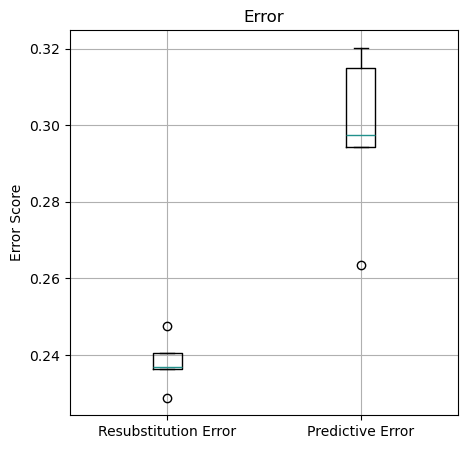

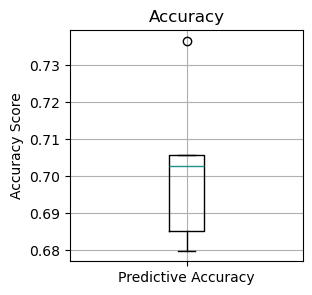

In [23]:
#Plot Errors
import matplotlib.cm as cm
all_errors=[all_errors_resub,all_errors_predict]
viridis = cm.get_cmap('viridis')
plt.figure(figsize=(5, 5))
plt.boxplot(all_errors, labels=['Resubstitution Error','Predictive Error'],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Error')
plt.ylabel('Error Score')
plt.grid(True)
plt.show()
#Plot accuracy scores averaged over 5 folds
plt.figure(figsize=(3,3))
plt.boxplot(all_accuracy_test, labels=["Predictive Accuracy"], patch_artist=False, medianprops=dict(color=viridis(0.5)))
plt.title('Accuracy')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

#Feature Selection

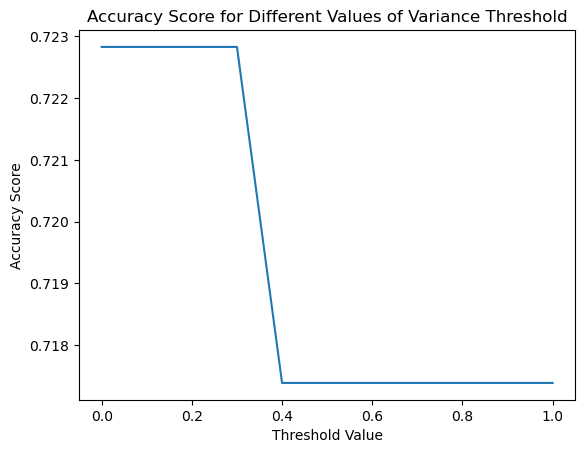

In [24]:
#Import variance threshold feature selection
from sklearn.feature_selection import VarianceThreshold
accuracy_scores_red=[]
#Perform feature selection using different variance thresholds
for ts in np.linspace(0,1,11):
    selector = VarianceThreshold(threshold=ts)  # adjust threshold if needed
    X_reduced = selector.fit_transform(X)
    X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size = 0.2, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = 11)
    knn.fit(X_train_red, y_train_red)
    y_pred_red = knn.predict(X_test_red)
    accuracy = accuracy_score(y_test_red, y_pred_red)
    accuracy_scores_red.append(accuracy)
# plot the accuracy score for each threshold value
ts_values = np.linspace(0,1,11)
plt.plot(ts_values, accuracy_scores_red)
plt.xlabel('Threshold Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of Variance Threshold')
plt.show()

[0.61956522 0.79891304 0.64673913 0.71584699 0.63387978]
[0.61956522 0.79891304 0.64673913 0.71584699 0.63387978]
[0.61956522 0.79891304 0.64673913 0.71584699 0.63387978]
[0.61956522 0.79891304 0.64673913 0.71584699 0.6284153 ]
[0.61956522 0.79891304 0.64673913 0.72131148 0.6284153 ]
[0.61956522 0.79891304 0.64673913 0.72131148 0.6284153 ]
[0.61956522 0.79891304 0.64673913 0.72131148 0.6284153 ]
[0.61956522 0.79891304 0.64673913 0.72131148 0.6284153 ]
[0.61956522 0.79891304 0.64673913 0.72131148 0.6284153 ]
[0.61956522 0.79891304 0.64673913 0.72131148 0.6284153 ]
[0.63043478 0.79891304 0.64673913 0.70491803 0.63934426]


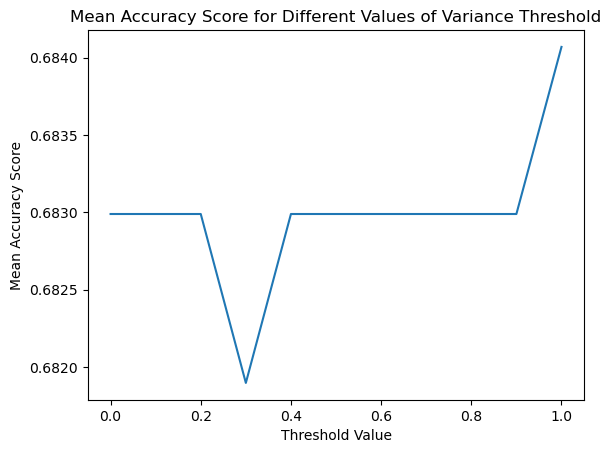

In [25]:
#Import variance threshold feature selection
from sklearn.feature_selection import VarianceThreshold
mean_accuracy_scores_red=[]
#Perform feature selection using different variance thresholds 
for ts in np.linspace(0,1,11):
    selector = VarianceThreshold(threshold=ts)  # adjust threshold if needed
    X_reduced = selector.fit_transform(X)
    knn = KNeighborsClassifier(n_neighbors = 11)
    scores = cross_val_score(knn, X_reduced, y, cv=5)
    print(scores)
    mean_accuracy = scores.mean()
    mean_accuracy_scores_red.append(mean_accuracy)
# plot the accuracy score for each threshold value
ts_values = np.linspace(0,1,11)
plt.plot(ts_values, mean_accuracy_scores_red)
plt.xlabel('Threshold Value')
plt.ylabel('Mean Accuracy Score')
plt.title('Mean Accuracy Score for Different Values of Variance Threshold')
plt.show()

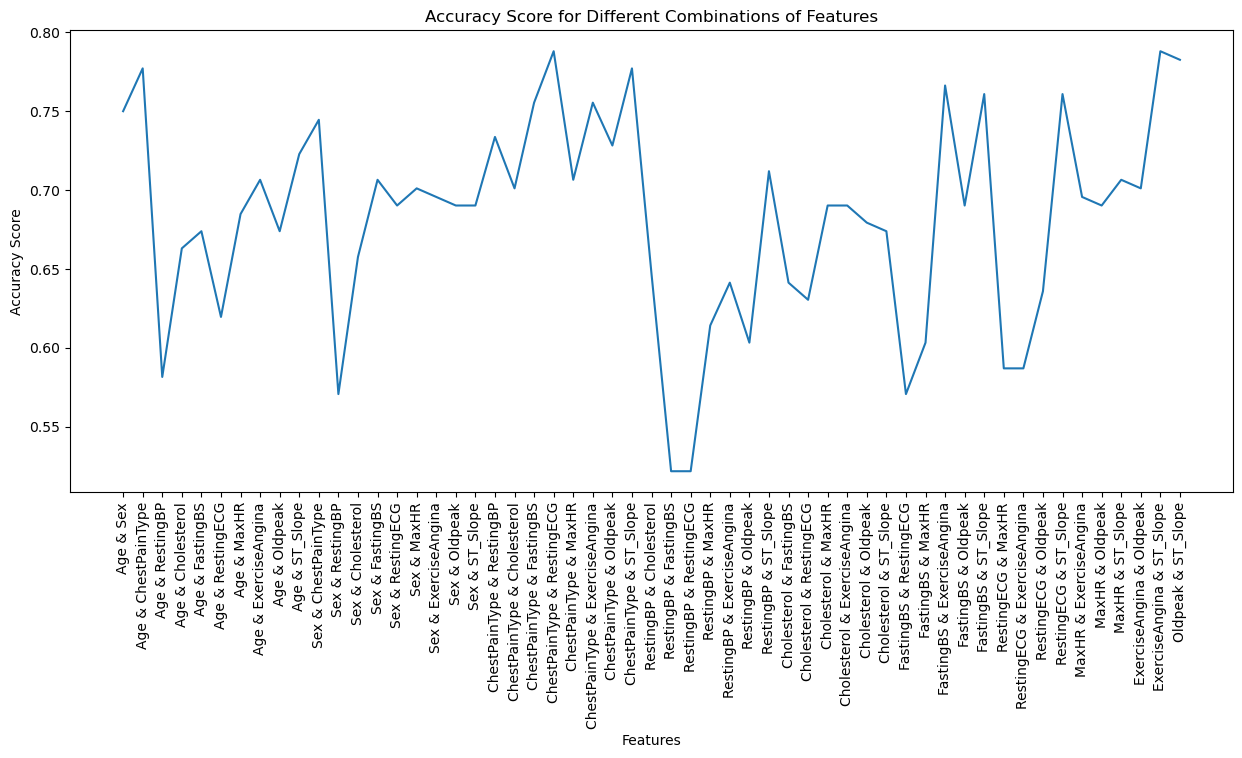

Best Combination of 2 Features: ['ChestPainType', 'RestingECG'] with accuracy score 0.7880434782608695


In [27]:
#Iterating through everyone combo of 2 predictors to see which yields the best classifier
#import combinations
from itertools import combinations
accuracy_scores_combo=[]
features_combo=[]
#Convert to pandas dataFrame
predict_combos=list(combinations(range(X.shape[1]),2)) #create all possible combos of column numbers
for combo in predict_combos: 
    X_combo=X.iloc[:,list(combo)]
    X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(X_combo, y, test_size = 0.2, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = 11)
    knn.fit(X_train_combo, y_train_combo)
    y_pred_combo = knn.predict(X_test_combo)
    accuracy = accuracy_score(y_test_combo, y_pred_combo)
    accuracy_scores_combo.append(accuracy)
    features=X.columns
    curr_features = [features[i] for i in combo]
    features_combo.append(curr_features)
features_combo_str = [' & '.join(combo) for combo in features_combo]
# plot the accuracy score for each threshold value
plt.figure(figsize=(15,6))
plt.plot(features_combo_str, accuracy_scores_combo)
plt.xlabel('Features') #too many combos to fit all labels
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Combinations of Features')
plt.show()
best_features = features_combo[accuracy_scores_combo.index(max(accuracy_scores_combo))]
print('Best Combination of 2 Features:', best_features, 'with accuracy score', max(accuracy_scores_combo))


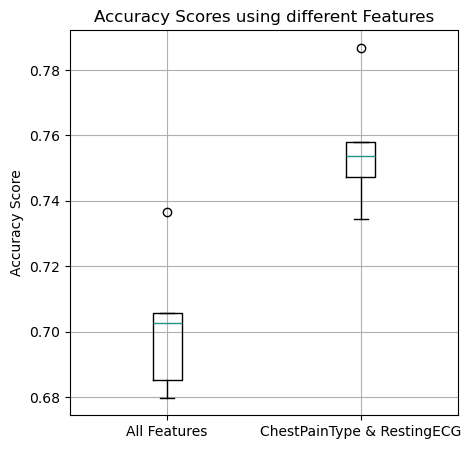

In [28]:
#plotting accuracy using all features versus best two features
#Using 5 folds 
from scipy.stats import ttest_ind
from matplotlib.cm import viridis
#ttest=ttest_ind()
kfolds=5
np.random.seed(10)
folds = np.random.randint(kfolds,size=X.shape[0])
best_combo=predict_combos[accuracy_scores_combo.index(max(accuracy_scores_combo))]
best_combo_name=features_combo_str[accuracy_scores_combo.index(max(accuracy_scores_combo))]
all_ft_accuracy=[]
best_ft_accuracy=[]
for kf in range(kfolds): 
    X_train=X.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_ft_accuracy.append(accuracy)
    X_combo=X.iloc[:,list(best_combo)]
    X_train_combo=X_combo.iloc[folds!=kf]
    y_train_combo=y.iloc[folds!=kf]
    X_test_combo=X_combo.iloc[folds==kf]
    y_test_combo=y.iloc[folds==kf]
    knn.fit(X_train_combo, y_train_combo)
    y_pred_combo = knn.predict(X_test_combo)
    accuracy_combo = accuracy_score(y_test_combo, y_pred_combo)
    best_ft_accuracy.append(accuracy_combo)
all_accuracy=[all_ft_accuracy,best_ft_accuracy]
#Plot accuracy using all features vs 2 best features
plt.figure(figsize=(5, 5))
plt.boxplot(all_accuracy, labels=['All Features',best_combo_name],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Accuracy Scores using different Features')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

PCA

NUMBER OF PRINCIPAL COMPONENTS: 1


/var/folders/cy/798vqkrj1p76h7c4p4q8_85c0000gn/T/ipykernel_54372/3954654429.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


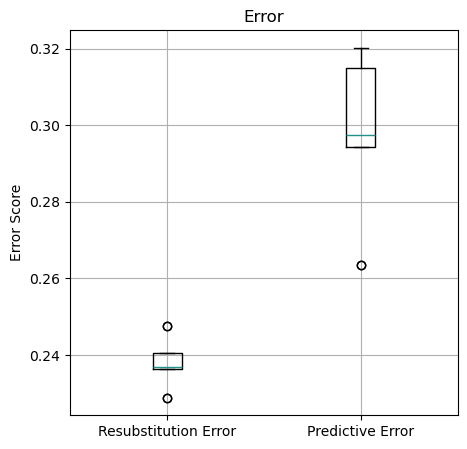

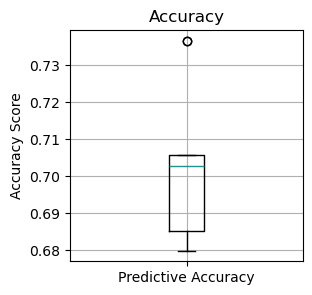

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)   #initialize PCA object with 90% variance explained
pca.fit(X) #fit the PCA object to the data
num_pc = pca.n_components_ #get the number of principal components
coef = pca.components_ #get the principal components
print(f"NUMBER OF PRINCIPAL COMPONENTS: {num_pc}")

kfolds=5
np.random.seed(10)
folds = np.random.randint(kfolds,size=X.shape[0])

for kf in range(kfolds): 
    X_train=X.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    error_resubstitution = (y_pred_train != y_train).mean()
    error_predictive = (y_pred_test != y_test).mean()
    accuracy_test = (y_pred_test == y_test).mean()
    all_errors_resub.append(error_resubstitution)
    all_errors_predict.append(error_predictive)
    all_accuracy_test.append(accuracy_test)
#Plot Errors
import matplotlib.cm as cm
all_errors=[all_errors_resub,all_errors_predict]
viridis = cm.get_cmap('viridis')
plt.figure(figsize=(5, 5))
plt.boxplot(all_errors, labels=['Resubstitution Error','Predictive Error'],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Error')
plt.ylabel('Error Score')
plt.grid(True)
plt.show()
#Plot accuracy scores averaged over 5 folds
plt.figure(figsize=(3,3))
plt.boxplot(all_accuracy_test, labels=["Predictive Accuracy"], patch_artist=False, medianprops=dict(color=viridis(0.5)))
plt.title('Accuracy')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()